In [1]:
from agents_experiments import (step_interact, ControlledAgent, IdleAgent, interact)
import logging
from luxai_s2 import LuxAI_S2
import matplotlib.pyplot as plt
from uuid import uuid4
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
def diagnose(obs_list, rew_list, don_list, inf_list, step_, agents_, log=logging.info):
    """
    What questions do I have?

    step
    board matrices (changed?)
    factories
    units
    resource levels
    actions
    time elapsed

    and more questions about the specifics of my algo
    ice and ore neighborhoods of each plant
    plant and resource assignments to robots
    shortest paths + weights from robots to tiles
    """
    o, r, d, i = obs_list[-1], rew_list[-1], don_list[-1], inf_list[-1]
    p0 = o['player_0']
    p1 = o['player_1']
    res = p0['real_env_steps']
    assert res == p1['real_env_steps']
    log(f"For players real_env_steps={res} while game_step's step={step_}")
    num_plants0 = p0['teams']['player_0']['factories_to_place']
    num_plants1 = p1['teams']['player_1']['factories_to_place']
    log(f"player 0 has {num_plants0} plants to place")
    log(f"player 1 has {num_plants1} plants to place")
    rubble, ice, ore = p0['board']['rubble'], p0['board']['ice'], p0['board']['ore']
    assert (rubble == p1['board']['rubble']).all()
    assert (ice == p1['board']['ice']).all()
    assert (ore == p1['board']['ore']).all()
    log(f"Map has total {ice.sum()} ice, {ore.sum()} ore and {rubble.sum()} rubble")
    log(f"first col totals {ice[:, 0].sum()} ice, {ore[:, 0].sum()} ore and {rubble[:, 0].sum()} rubble")
    log(f"first row totals {ice[0, :].sum()} ice, {ore[0, :].sum()} ore and {rubble[0, :].sum()} rubble")

In [3]:
env = LuxAI_S2()

In [4]:
a1 = ControlledAgent('player_0', env.env_cfg, True, threshold=15, radius=130)
a2 = IdleAgent('player_1', env.env_cfg, True, threshold=15, radius=130)

In [5]:
agents = {a.player: a for a in [a1, a2]}
agents

{'player_0': <agents_experiments.ControlledAgent at 0x7fc4702e2f90>,
 'player_1': <agents_experiments.IdleAgent at 0x7fc4702e2d90>}

In [7]:
logger.setLevel(logging.WARNING)

filename = str(uuid4()) + '.mp4'
file_path = '/home/adrian_admin/prog/kaggle/lux-ai-2/Lux-Design-S2/data/experiments/adrian/'
animate_arg = file_path + filename
_ = interact(env, agents, 50, animate_=animate_arg, seed=5)

In [8]:
from IPython.display import Video

In [9]:
Video(animate_arg, embed=True)

In [6]:
game_step = step_interact(env, agents, 150, 5)

In [7]:
obs, rewards, dones, infos = [], [], [], []

In [8]:
known_step = -1

In [9]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{}
INFO:root:For players real_env_steps=-4 while game_step's step=1
INFO:root:player 0 has 2 plants to place
INFO:root:player 1 has 2 plants to place
INFO:root:Map has total 38 ice, 15 ore and 112145 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [10]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Generate Spawners: 1.30
INFO:root:Choose Locations: 0.64
INFO:root:Generate Spawners: 1.22
INFO:root:Total time stats:{'player_0 spawn_timer': 1.29920258599941, 'player_0 choose_loc_timer': 0.6410220319994551, 'player_1 spawn_timer': 1.2190613380007562}
INFO:root:For players real_env_steps=-3 while game_step's step=2
INFO:root:player 0 has 1 plants to place
INFO:root:player 1 has 2 plants to place
INFO:root:Map has total 38 ice, 15 ore and 112102 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [11]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Generate Spawners: 1.36
INFO:root:Generate Spawners: 1.23
INFO:root:Choose Locations: 0.52
INFO:root:Total time stats:{'player_0 spawn_timer': 2.6587108889989395, 'player_0 choose_loc_timer': 0.6410220319994551, 'player_1 spawn_timer': 2.448702048000996, 'player_1 choose_loc_timer': 0.5229766239999663}
INFO:root:For players real_env_steps=-2 while game_step's step=3
INFO:root:player 0 has 1 plants to place
INFO:root:player 1 has 1 plants to place
INFO:root:Map has total 38 ice, 15 ore and 112084 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [12]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Generate Spawners: 1.36
INFO:root:Choose Locations: 2.31
INFO:root:Generate Spawners: 1.31
INFO:root:Total time stats:{'player_0 spawn_timer': 4.014213599998584, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 3.7574410530014575, 'player_1 choose_loc_timer': 0.5229766239999663, 'MapPlanner_timer 1': 1.4841988269972717}
INFO:root:For players real_env_steps=-1 while game_step's step=4
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 1 plants to place
INFO:root:Map has total 38 ice, 15 ore and 112001 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [13]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Generate Spawners: 1.43
INFO:root:Generate Spawners: 1.37
INFO:root:Choose Locations: 2.63
INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.357386820995089}
INFO:root:For players real_env_steps=0 while game_step's step=5
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111784 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [14]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.357386820995089}
INFO:root:For players real_env_steps=1 while game_step's step=6
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111784 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [15]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:
sending robot RobotId(unit_id='unit_4', type='HEAVY') currently at position x:3 y:12
on an ice cycle with start tile x:4 y:12 and target tile x:3 y:8
Full compressed queue is [array([0, 2, 0, 1, 0, 1]), array([0, 1, 0, 1, 1, 4]), array([3, 0, 0, 1, 1, 5]), array([0, 3, 0, 1, 1, 4]), array([  1,   0,   0, 100,   1,   1]), array([  2,   0,   4, 500,   1,   1])]

INFO:root:
sending robot RobotId(unit_id='unit_5', type='HEAVY') currently at position x:24 y:22
on an ore cycle with start tile x:25 y:22 and target tile x:24 y:24
Full compressed queue is [array([0, 2, 0, 1, 0, 1]), array([0, 3, 0, 1, 1, 2]), array([3, 0, 0, 1, 1, 5]), array([0, 1, 0, 1, 1, 2]), array([  1,   0,   1, 100,   1,   1]), array([  2,   0,   4, 500,   1,   1])]

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.358261821995

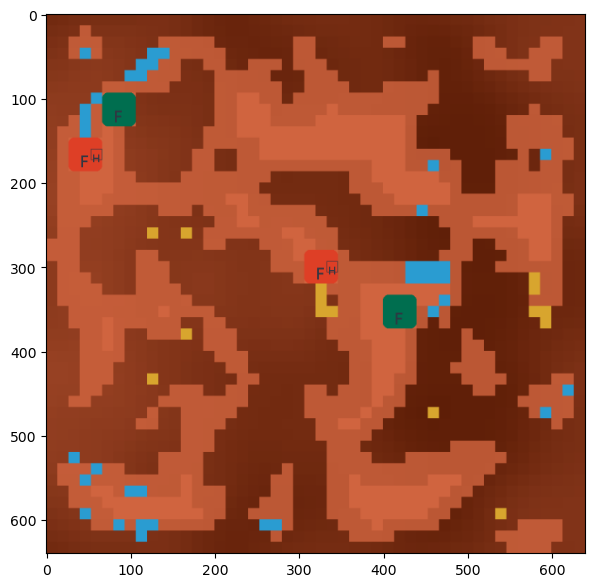

In [16]:
# let's plot the map
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);

In [17]:
player = agents['player_0']
player_obs = player.oracle['obs']

In [18]:
player_obs.myself

'player_0'

In [19]:
player_obs.robot_ids

[RobotId(unit_id='unit_4', type='HEAVY'),
 RobotId(unit_id='unit_5', type='HEAVY')]

In [27]:
units = {}
for rid in player_obs.generate_robot_obs():
    print(rid.myself, rid.pos)
    units[rid.myself] = rid

RobotId(unit_id='unit_4', type='HEAVY') x:3 y:12
RobotId(unit_id='unit_5', type='HEAVY') x:24 y:22


In [23]:
agents['player_1'].oracle  # why rubble at 0?

defaultdict(dict,
            {'heavy_price': {'metal': 100, 'power': 500},
             'light_price': {'metal': 10, 'power': 50},
             'rubble': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0]]),
             'plant_resource_nghb': {x:31 y:26 size:48: {'ice': [x:34 y:26 size:48,
                x:35 y:25 size:48,
                x:32 y:23 size:48,
                x:33 y:23 size:48],
               'ore': []},
              x:6 y:8 size:48: {'ice': [x:3 y:8 size:48,
                x:3 y:9 size:48,
                x:7 y:5 size:48,
                x:4 y:7 size:48],
               'ore': []}},
             'obs': {}})

In [24]:
player_obs.rubble_map

array([[83, 79, 75, ..., 75, 79, 83],
       [81, 77, 73, ..., 73, 77, 81],
       [79, 75, 14, ..., 71, 75, 79],
       ...,
       [71, 71, 14, ..., 14, 14, 71],
       [71, 70, 70, ..., 70, 70, 71],
       [70, 70, 70, ..., 70, 70, 70]])

In [26]:
player.oracle['rubble']

array([[83, 79, 75, ..., 75, 79, 83],
       [81, 77, 73, ..., 73, 77, 81],
       [79, 75, 14, ..., 71, 75, 79],
       ...,
       [71, 71, 14, ..., 14, 14, 71],
       [71, 70, 70, ..., 70, 70, 71],
       [70, 70, 70, ..., 70, 70, 70]])

In [30]:
from obs import RobotId
from space import CartesianPoint

In [33]:
unit = units[RobotId('unit_4', 'HEAVY')]

In [34]:
unit.myself

RobotId(unit_id='unit_4', type='HEAVY')

In [35]:
unit.my_type

'HEAVY'

In [36]:
unit.unit_id

'unit_4'

In [38]:
oracle = player.oracle

In [40]:
from pprint import pprint

In [41]:
pprint(oracle)  # wrong current count in robots_to_plants_quotas

defaultdict(<class 'dict'>,
            {'dobs': {'board': {'factories_per_team': 2,
                                'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
                                'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
                                'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
                                'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0,

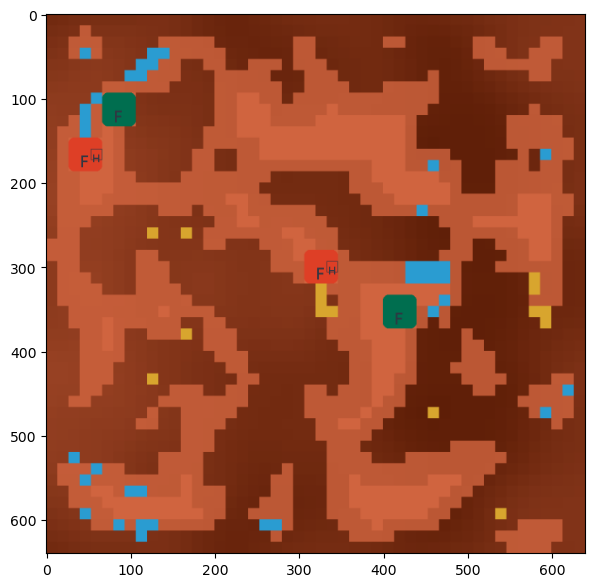

In [45]:
# let's plot the map
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);

In [43]:
oracle['dobs']['board']['ice'][:15, :15]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [44]:
(player_obs.ice_map == oracle['dobs']['board']['ice']).all()

True

In [46]:
player_obs.ice_map[3][8]

1

In [47]:
player_obs.ice_map[3, 8]

1

In [48]:
player_obs.ice_map[8, 3]

0

In [49]:
unit.queue

[]

In [50]:
unit.queue_is_empty

True

In [51]:
unit.pos

x:3 y:12 size:48

In [52]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=3 while game_step's step=8
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111784 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


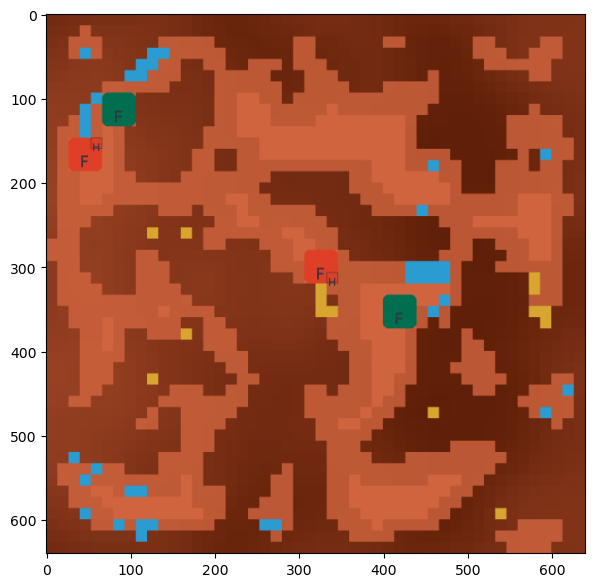

In [53]:
# let's plot the map
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);

In [54]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=4 while game_step's step=9
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111784 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [55]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=5 while game_step's step=10
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111770 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [56]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=6 while game_step's step=11
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111770 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [57]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=7 while game_step's step=12
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111759 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


In [58]:
known_step += 1
o1, o2, o3, o4, st, ag = next(game_step)
obs.append(o1); rewards.append(o2); dones.append(o3); infos.append(o4)
diagnose(obs, rewards, dones, infos, st, ag)

INFO:root:Total time stats:{'player_0 spawn_timer': 5.444162374998086, 'player_0 choose_loc_timer': 2.9470939819993873, 'player_1 spawn_timer': 5.132150594001359, 'player_1 choose_loc_timer': 3.1541980379997767, 'MapPlanner_timer 1': 3.3582618219952565}
INFO:root:For players real_env_steps=8 while game_step's step=13
INFO:root:player 0 has 0 plants to place
INFO:root:player 1 has 0 plants to place
INFO:root:Map has total 38 ice, 15 ore and 111759 rubble
INFO:root:first col totals 0 ice, 0 ore and 3877 rubble
INFO:root:first row totals 0 ice, 0 ore and 2787 rubble


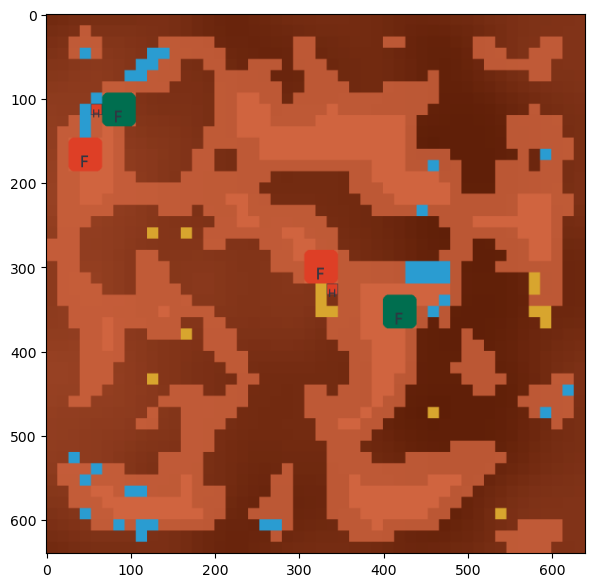

In [59]:
# let's plot the map
img = env.render("rgb_array", width=640, height=640)
f, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img);

In [61]:
for robot in ag['player_0'].oracle['obs'].generate_robot_obs():
    if robot.unit_id == 'unit_4':
        unit = robot
        break

In [62]:
unit.queue

[array([3, 0, 0, 0, 1, 4]),
 array([0, 3, 0, 0, 1, 4]),
 array([  1,   0,   0, 100,   1,   1]),
 array([  2,   0,   4, 500,   1,   1]),
 array([0, 1, 0, 0, 1, 1])]